In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import bitcoin.db as db

In [4]:
df_30 = db.get_all_data_from_pas(pas=10)
df_30.describe()

2018-03-28 14:51:11,240 root         INFO     Load data from SQL.


,open,tw_sentiment,reddit_sentiment,google_sentiment,close,time,percent,up
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000
mean,7210.856338,0.051808,0.056937,0.021694,7210.018596,1.521249e+09,-0.009640,0.50000
std,695.412756,0.070005,0.033839,0.057598,694.663236,5.716763e+05,0.490418,0.50008
min,5955.390000,-0.164520,-0.027392,-0.108224,5974.960000,1.520272e+09,-3.718436,0.00000
25%,6735.042500,0.012189,0.031726,-0.015715,6735.007500,1.520744e+09,-0.229216,0.00000
50%,7084.600000,0.039983,0.056439,0.017888,7083.945000,1.521271e+09,0.000053,0.50000
75%,7476.912500,0.077455,0.081315,0.054079,7476.750000,1.521749e+09,0.219137,1.00000
max,9398.990000,0.595975,0.168269,0.211511,9399.000000,1.522223e+09,3.584791,1.00000


# Covariance

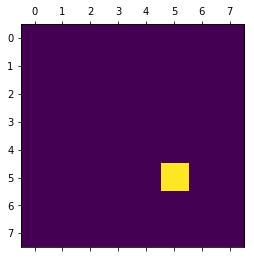

In [5]:
cov = df_30.cov()
plt.matshow(cov)

# Correlation

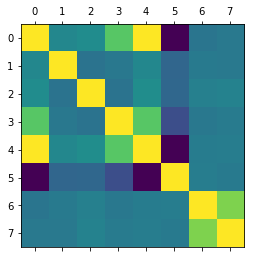

In [6]:
corr = df_30.corr()
plt.matshow(corr)

# PCA

In [9]:
from sklearn.decomposition import PCA
import pandas as pd

X = df_30[['open', 'google_sentiment']]
X.describe()

,open,google_sentiment
count,3140.000000,3140.000000
mean,7210.856338,0.021694
std,695.412756,0.057598
min,5955.390000,-0.108224
25%,6735.042500,-0.015715
50%,7084.600000,0.017888
75%,7476.912500,0.054079
max,9398.990000,0.211511


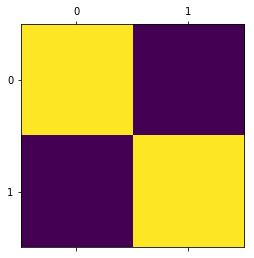

In [10]:
pca = PCA(n_components=1)
df_pca = pd.DataFrame()
df_pca['open'] = df_30['close']
df_pca['pca'] = pca.fit_transform(X)
corr = df_pca.corr()
plt.matshow(corr)